# Logistic Regression - Example
### Bank Sample Bank Data from Marketing Campaigns
### Includes EDA, Data Preparation and Feature Engineering

In [26]:
#Import and prepare data for logistic regression model
#This is a random (and cleaned up) Bank Marketing dataset available from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
#We are going to try and build a logistic regression model to predict column "y"

#I'm generally following a really great blog post also working with this bank data set
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#Start off by importing the data
import pandas as pd
import numpy as np

dataset = pd.read_csv("G:\Shared drives\EcommPC\Customer Analytics\Python\Logistic Regression Bank Data.csv")

dataset

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [27]:
#Before feature engineering later, set the target variable y to binary values 1 and zero
# This will help with understanding the data and ETA

# THIS CAN ONLY BE RUN ONCE, otherwise it will overwrite the y values all to zero
# Numpy where = np.where(dataset [some condition], value if true, value if false) - similar to Excel If Statment
#dataset['y'] = np.where(dataset['y'] == 'yes', '1','0')
dataset['y'] = dataset['y'].astype(float)



In [29]:
#Describe data (numberic fields only)
dataset.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous             y  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

In [30]:
#Logistic Regression cannot cope with null values. These need to be appropriately replaced if so.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  float64
dtypes: float64(1), int64(7), object(9)
memory usage: 5.9+ MB


In [31]:
#Perform EDA on the independant variables to understand the distribution of data and potential use in the final model
# In the Blog Post, the education column has a number of unique values
# dataset['education'].unique()
# In this case, grouping unnecessary detail will improve model performance
# But not required with our version of the dataset

# # ******  EDA *********

In [32]:
# Check distribution of successes to failures for the target column we are trying to predict
# For Logistic Regression, we want a 50:50 balance of yes/no, 1/0's

dataset['y'].value_counts()

0.0    39922
1.0     5289
Name: y, dtype: int64

In [33]:
#Explore the target variable (y)
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='y',data = dataset,palette = 'hls')

In [34]:
# For numeric values, calculate the mean, grouping by the target variable
dataset.groupby('y').mean()

age      balance        day    duration  campaign      pdays  \
y                                                                         
0.0  40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
1.0  41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

     previous  
y              
0.0  0.502154  
1.0  1.170354

In [35]:
#Calculate mean values across some of the categorical variables
dataset.groupby('job').mean()

age      balance        day    duration  campaign  \
job                                                                      
admin.         39.289886  1135.838909  15.564301  246.896732  2.575324   
blue-collar    40.044081  1078.826654  15.442561  262.901562  2.816995   
entrepreneur   42.190989  1521.470074  15.702085  256.309348  2.799597   
housemaid      46.415323  1392.395161  16.002419  245.825000  2.820968   
management     40.449567  1763.616832  16.114189  253.995771  2.864348   
retired        61.626767  1984.215106  15.439488  287.361307  2.346731   
self-employed  40.484484  1647.970868  16.027866  268.157061  2.853072   
services       38.740250   997.088108  15.635532  259.318729  2.718344   
student        26.542644  1388.060768  14.897655  246.656716  2.299574   
technician     39.314598  1252.632092  16.408582  252.904962  2.906805   
unemployed     40.961627  1521.745971  15.498081  288.543361  2.432080   
unknown        47.593750  1772.357639  14.642361  237.611111  3.309028   

                   pdays  previous         y  
job                                           
admin.         47.859021  0.671630  0.122027  
blue-collar    44.033498  0.505138  0.072750  
entrepreneur   32.486214  0.478144  0.082717  
housemaid      21.505645  0.371774  0.087903  
management     38.665468  0.668006  0.137556  
retired        37.443905  0.638693  0.227915  
self-employed  34.747308  0.551615  0.118429  
services       41.995185  0.501204  0.088830  
student        57.041578  0.953092  0.286780  
technician     37.195077  0.574569  0.110570  
unemployed     34.146585  0.466616  0.155027  
unknown        20.982639  0.319444  0.118056

In [36]:
# Calculate the mean for other categorical variables
dataset.groupby('education').mean()

age      balance        day    duration  campaign      pdays  \
education                                                                       
primary    45.865567  1250.949934  15.421398  255.933002  2.834331  36.081740   
secondary  39.964270  1154.880786  15.759159  258.685760  2.700802  42.353504   
tertiary   39.593640  1758.416435  16.086535  258.518532  2.825577  39.024134   
unknown    44.510501  1526.754443  15.810985  257.313947  2.849219  36.856220   

           previous         y  
education                      
primary    0.489272  0.086265  
secondary  0.567753  0.105594  
tertiary   0.661980  0.150064  
unknown    0.488422  0.135703

In [37]:
dataset.groupby('marital').mean()

age      balance        day    duration  campaign      pdays  \
marital                                                                        
divorced  45.782984  1178.872287  15.796428  262.517188  2.630882  41.001728   
married   43.408099  1425.925590  15.854487  253.412765  2.842875  37.950467   
single    33.703440  1301.497654  15.708210  266.497967  2.649805  44.652385   

          previous         y  
marital                       
divorced  0.551373  0.119455  
married   0.556552  0.101235  
single    0.642690  0.149492

In [38]:
#Visualise some of the variables

#First crosstab the data otherwise you're plotting a point for each row!
vis = pd.crosstab(dataset.job, dataset.y)

#Sort the data (this is not necessary but just for fun)
vis.sort_values(by = 0.0, ascending = False)

y               0.0   1.0
job                      
blue-collar    9024   708
management     8157  1301
technician     6757   840
admin.         4540   631
services       3785   369
retired        1748   516
self-employed  1392   187
entrepreneur   1364   123
housemaid      1131   109
unemployed     1101   202
student         669   269
unknown         254    34

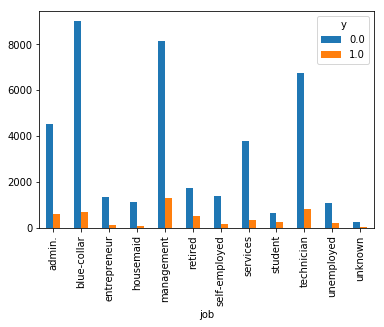

In [39]:
#Plot the data as a bar chart
vis.plot(kind = 'bar')

In [40]:
#Crosstab and plot the remaining categorical variables
vis1 = pd.crosstab(dataset.education, dataset.y)
vis2 = pd.crosstab(dataset.marital, dataset.y)
#Calcualte percentages to build a stacked bar chart for each variable
vis1a = vis1.div(vis1.sum(1).astype(float), axis=0)
vis2a = vis2.div(vis2.sum(1).astype(float), axis=0)

#Print the outputs
print(vis1.head(),'\n' + '\n',vis2.head(),'\n' + '\n',vis1a.head(),'\n' + '\n',vis2a.head()) # Newline 

y            0.0   1.0
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252 

 y           0.0   1.0
marital              
divorced   4585   622
married   24459  2755
single    10878  1912 

 y               0.0       1.0
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703 

 y              0.0       1.0
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492


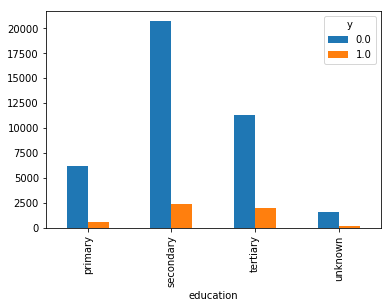

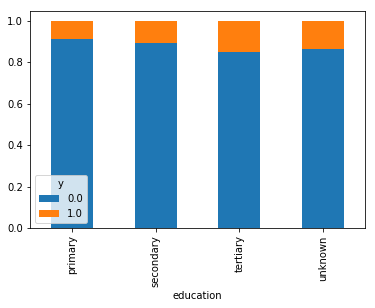

In [41]:
#Plot the outputs for education levels
vis1.plot(kind = 'bar') 
vis1a.plot(kind = 'bar', stacked = True)

#We can see that education has a moderate impact likelyhood of signing up

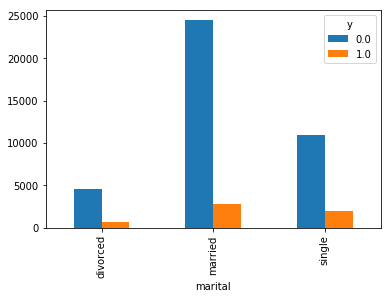

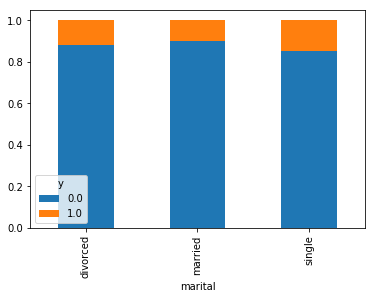

In [42]:
#Plot the outputs for marital status
vis2.plot(kind = 'bar')
vis2a.plot(kind = 'bar', stacked = True)

#We can see that marital status has a moderate impact on propensity to sign-up

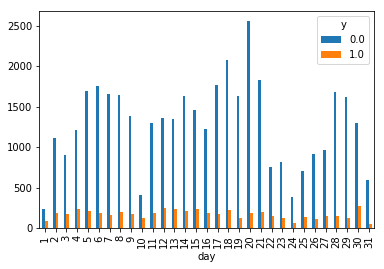

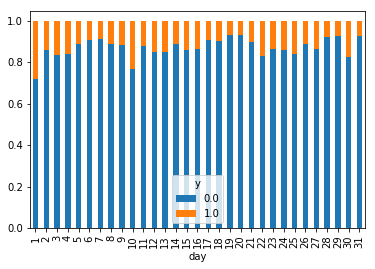

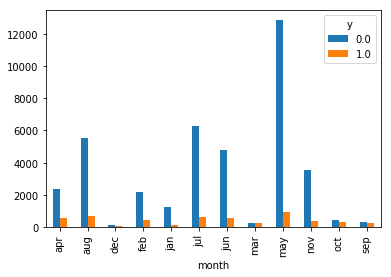

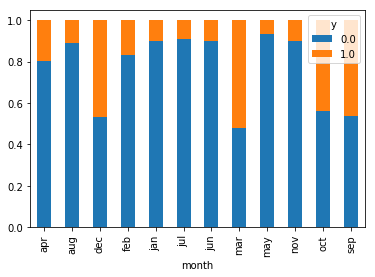

In [43]:
#Now lets look at the day and month of the contact date

vis3 = pd.crosstab(dataset.day, dataset.y)
vis3a = vis3.div(vis3.sum(1).astype(float), axis=0)
vis4 = pd.crosstab(dataset.month, dataset.y)
vis4a = vis4.div(vis4.sum(1).astype(float), axis=0)


vis3.plot(kind = 'bar')
vis3a.plot(kind = 'bar', stacked = True)
vis4.plot(kind = 'bar')
vis4a.plot(kind = 'bar', stacked = True)

#Day of month looks relatively good
#Month of year looks like a very strong predictor (march and december)

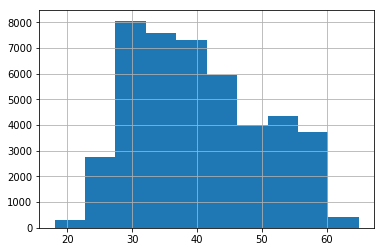

In [45]:
#Then review age profiles
#Remove the oldest customers to clean up the chart

dataset_age_cleaned = dataset[dataset["age"] <= 65]
vis5 = pd.crosstab(dataset_age_cleaned.age, dataset.y)
vis5a = vis5.div(vis5.sum(1).astype(float), axis=0)
dataset_age_cleaned['age'].hist()



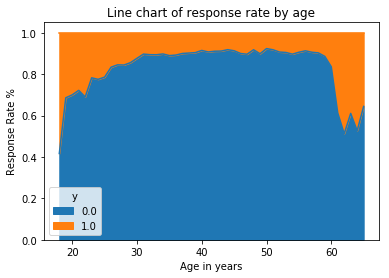

In [46]:
#Age looks like quite a good predictor
vis5a.plot(kind = 'area') #'line', 'bar' etc also valid
plt.title('Line chart of response rate by age')
plt.xlabel('Age in years')
plt.ylabel('Response Rate %')
plt.savefig('line_age')

(<matplotlib.axes._subplots.AxesSubplot at 0xde1e630>,
 <matplotlib.axes._subplots.AxesSubplot at 0xde74320>)

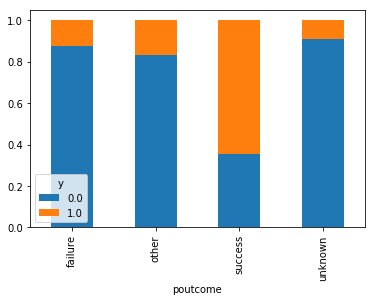

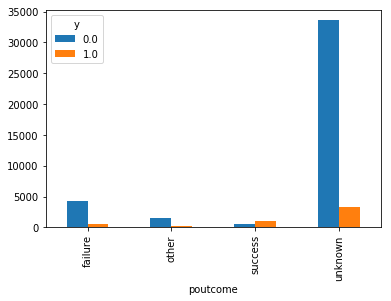

In [47]:
#Outcome of previous campaigns
vis6 = pd.crosstab(dataset.poutcome,dataset.y)
vis6a = vis6.div(vis6.sum(1).astype(float),axis = 0)
vis6a.plot(kind = 'bar',stacked = True), vis6.plot(kind = 'bar')

# So, a previus successfull campaign is highly predictive, but only applies to a small % of customers/suckers

# Create Dummy Fields for Logistic Regression Model
##### Logistic regression models cannot process categorical data so needs to be converted into Boolean e.g. marital_single, marital_divorced, marital_married etc

In [48]:
#This can be done by manipulating columns/data using the pandas pd.get_dummies function and some clever logic
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome'] #List all categorical variables
for var in cat_vars: #loop through each object in cat_vars
    cat_list = pd.get_dummies(dataset[var], prefix=var) #Convert data to dummy columns, prefixing col header with original name
    dataset = dataset.join(cat_list) #Append new cols to existing DF
print(dataset.info()) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   job                  45211 non-null  object 
 2   marital              45211 non-null  object 
 3   education            45211 non-null  object 
 4   default              45211 non-null  object 
 5   balance              45211 non-null  int64  
 6   housing              45211 non-null  object 
 7   loan                 45211 non-null  object 
 8   contact              45211 non-null  object 
 9   day                  45211 non-null  int64  
 10  month                45211 non-null  object 
 11  duration             45211 non-null  int64  
 12  campaign             45211 non-null  int64  
 13  pdays                45211 non-null  int64  
 14  previous             45211 non-null  int64  
 15  poutcome             45211 non-null 

In [49]:
#Now keep all columns we're going to use in the model, drop all original categorical variables

data_vars = dataset.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final = dataset[to_keep]
data_final.columns.values #Final set of columns

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

# Create Test and Training Data. Adjust Sample Sizes (SMOTE)
### Synthetic Minority Oversampling Technique. Where the target variable is not evenly balanced between 1s and 0s, you need adjust the dataset such that it is.
#### One option is to upscale the minority value (1s in this case) by "synthetically" creating addtional records by generating small random modifications to next nearest neighbours

In [56]:
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
#pip install imblearn

from sklearn.model_selection import train_test_split


#Split the data into Xs and Y
X = data_final.loc[:, data_final.columns != 'y'] #All columns except y
y = data_final.loc[:, data_final.columns == 'y'] #Only col y

#Load SMOTE and initialise
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train)

#columns = X_train.columns
#os_data_X,os_data_y=os.fit_sample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
#print("length of oversampled data is ",len(os_data_X))
#print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
#print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
#print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
#print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
24951   58     1021   18       205         1     -1         0           0   
22129   55      196   21       168         2     -1         0           0   
986     50      159    7       216         2     -1         0           1   
14999   43     1880   17        63         6     -1         0           0   
4027    53      647   16       512         6     -1         0           0   
...    ...      ...  ...       ...       ...    ...       ...         ...   
30403   35      995    5        39         1     -1         0           0   
21243   35      750   18       233        12     -1         0           0   
42613   35      323   11       261         2     -1         0           0   
43567   70      616   27       149         2    182         1           0   
2732    46       57   14       194         4     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
2495